# Material Deformation - Using QUBO


In [1]:
import sys as sys
import pandas as pd
import numpy as np
import pandas as pd
import random, math
import copy
import numba
from numba import jit
import tqdm
from time import time
from tqdm import tqdm
from matplotlib import pyplot as plt
df = pd.read_csv(r'C:\Users\Bhargav\BMW\Set C\128x128_-16%-9789.csv',header=None)
#df.as_matrix()



In [2]:
#np.set_printoptions(threshold=sys.maxsize)

In [3]:
X1 = df.values

In [4]:
X1

array([[29., 21.,  0., ...,  0., 22., 30.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 16.,  0.],
       [ 0.,  0.,  0., ...,  0., 30.,  0.]])

In [5]:

X1.shape

(128, 128)

In [6]:
X = np.true_divide(X1 ,  2000)

In [7]:
X

array([[0.0145, 0.0105, 0.    , ..., 0.    , 0.011 , 0.015 ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.008 , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.015 , 0.    ]])

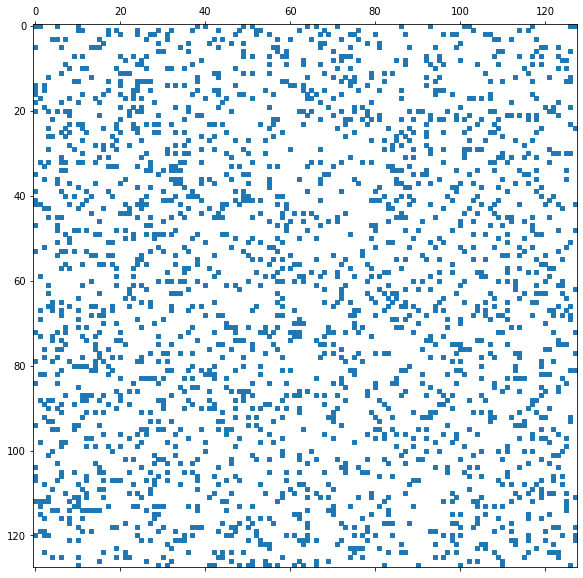

In [8]:
plt.spy(X, precision = 0.01, markersize = 4)
# betterspy.write_png("out.png", X , border_width=2, border_color="red", colormap="viridis")
# betterspy 1138.mtx [Matrix.png]
# betterspy.show(X)
# betterspy.write_png("X matrix", X)
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2.5, Size[1]*2.5, forward=True)

# plt.colorbar()
# plt.show()

In [9]:
df1 = pd.read_csv(r'C:\Users\Bhargav\BMW\Set C\128x1_-16%-9789.csv',header=None)
#df.as_matrix()

In [10]:
Y1=df1.values

In [11]:
Y1.shape

(128, 1)

In [12]:
Y = np.true_divide(Y1 , 2000)

In [13]:
Y

array([[0.    ],
       [0.008 ],
       [0.    ],
       [0.0105],
       [0.0115],
       [0.0135],
       [0.    ],
       [0.    ],
       [0.0105],
       [0.017 ],
       [0.    ],
       [0.    ],
       [0.0105],
       [0.01  ],
       [0.012 ],
       [0.    ],
       [0.    ],
       [0.015 ],
       [0.015 ],
       [0.    ],
       [0.015 ],
       [0.    ],
       [0.0095],
       [0.014 ],
       [0.0175],
       [0.    ],
       [0.    ],
       [0.0125],
       [0.    ],
       [0.014 ],
       [0.008 ],
       [0.    ],
       [0.    ],
       [0.009 ],
       [0.    ],
       [0.    ],
       [0.0155],
       [0.    ],
       [0.    ],
       [0.013 ],
       [0.014 ],
       [0.0145],
       [0.011 ],
       [0.0135],
       [0.014 ],
       [0.    ],
       [0.    ],
       [0.0095],
       [0.    ],
       [0.0155],
       [0.    ],
       [0.    ],
       [0.0105],
       [0.    ],
       [0.0105],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.0135

In [14]:
Dimension = 128
bits = 13     
#b = HDimension = 16
#qubits = 2
A = X
b = Y
m = 6

In [15]:
t0 = time()

In [16]:
QM = np.zeros(((bits+1)*Dimension, (bits+1)*Dimension), dtype=np.float64)
QM

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
QM.shape

(1792, 1792)

In [18]:
for k in range(Dimension):
    for i in range(Dimension):
        for l in range(-8,5):
            cef1 = pow(2,2*l)* pow (A[k][i],2)-pow(2,l+1)* A[k][i]*b[k]
            po1 = 14*i + l + 8
            QM[po1][po1] = QM[po1][po1] + cef1
            #################################################
            cef2 = -pow(2,(l+m+2))* pow (A[k][i],2)
            po3 = 14*i + 1  # q_i-
            po4 = 14*i + l + 8 #q_i,l +
            QM[po3][po4] = QM[po3][po4] + cef2
            
            
#QM #okkkkkkkkkkkkkkkkkkkkkk

In [19]:

# No l loop +13?????

# 2nd for loop
for k in range(Dimension):
    for i in range(Dimension):
            cef1 = pow(2,(2*m+2))* pow (A[k][i],2)
            cef2= pow(2,m+2)* A[k][i]*b[k]
            po1 = 14*i  
            po2 = 14*i + 1
            QM[po2][po2] = QM[po2][po2] + cef1 #q-
            QM[po1][po1] = QM[po1][po1] + cef2  # q+
            
#QM #okkkkkkkkkkkkkkkkkk

In [20]:
# 3rd for loop
@jit(nopython=True)

def faster0(QM): 
    for k in range(Dimension):
        for i in range(Dimension):
            for l1 in range(-8,5):
                for l2 in range(l1+1,5):
                    qcef = pow(2, l1+l2+1)*pow(A[k][i],2)
                    po1 = 14*i + l1 + 8
                    po2 = 14*i + l2 + 8
                    QM[po1][po2] = QM[po1][po2] + qcef
    return QM

QM = faster0(QM)  
#QM
######### okkkkkk 

In [21]:
## 4th for loop
@jit(nopython=True)

def faster(QM):  
    for k in range(Dimension):
        for i in range(Dimension-1):
            for j in range(i+1,Dimension):
                for l1 in range(-8,5):
                    for l2 in range(-8,5):
                        qcef = pow(2, l1+l2+1) * A[k][i] * A[k][j]
                        po1 = 14*i + l1 + 8
                        po2 = 14*j + l2 + 8
                        QM[po1][po2] = QM[po1][po2] + qcef
    return QM

QM = faster(QM) 
#QM
#### okkkkkkkkkkkkkkkkkkkkk

In [22]:
###5th loop
@jit(nopython=True)

def faster1(QM): 
    for k in range(Dimension):
        for i in range(Dimension-1):
            for j in range(i+1,Dimension):
                qcef = pow(2, m+3) * A[k][i]*A[k][j]
                po1 = 14*i + 1
                po2 = 14*j + 1
                QM[po1][po2] = QM[po1][po2] + qcef

                for l in range(-8,5):
                    qcef1 = -pow(2, l+m+2) * A[k][i] * A[k][j]
                    po1 = 14*i + 1  # q_i -
                    po2 = 14*j + l + 8 # q_j,l +
                    QM[po1][po2] = QM[po1][po2] + qcef1

                    po3 = 14*i + l + 8  #q_i,l+
                    po4 = 14*j + 1  # q_j-
                    QM[po3][po4] = QM[po3][po4] + qcef1
    return QM
                
QM = faster1(QM)
#QM
###okkkkkkkkkkkkk

In [23]:
QM

array([[ 6.08685489e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.23950000e-03,  6.94514521e+01, -1.69580000e-02, ...,
        -1.65785600e+00, -3.31571200e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -7.32696533e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.48952000e-01,  6.82240000e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  6.39024000e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [24]:
time_taken_qubogen=time()-t0
time_taken_qubogen

5.888513088226318

In [25]:
from dwave.system import LeapHybridSampler

In [26]:
sampler = LeapHybridSampler(Profile='Max1')

In [27]:
# %%capture captured
# # Print Python code for the run in D-Wave quantum processing unit
# print("\n\nfrom dwave.system import DWaveSampler, EmbeddingComposite")
# print("sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))\n")
# #from dwave.system import DWaveSampler, EmbeddingComposite
# #sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))

# print("linear = {", end = "")
# for i in range((bits+1)*Dimension-1): 
#     linear = i + 1
#     print ("('q",linear,"','q",linear,"'):",format(QM[i][i]),sep='', end = ", ")
# print ("('q",(bits+1)*Dimension,"','q",(bits+1)*Dimension,"'):",format(QM[(bits+1)*Dimension-1][(bits+1)*Dimension-1]),"}", sep='')

# print("\nquadratic = {", end = "")
# for i in range((bits+1)*Dimension-1):
#     for j in range(i+1,(bits+1)*Dimension):
#         if QM[i][j] != 0:
#             qdrt1 = i + 1
#             qdrt2 = j + 1
#             if i == (bits+1)*Dimension-2 and j == (bits+1)*Dimension-1:
#                 print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), "}", sep='')
#             else:
#                 print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), sep ='', end = ", ")

# print("\nQ = dict(linear)")
# print("Q.update(quadratic)\n")

# qa_iter = 1000
# #print("sampleset = sampler_auto.sample_qubo(Q, num_reads=",qa_iter,")", sep = "")
# #print("print(sampleset)")

# #Q = dict(linear)
# #Q.update(quadratic)
# print("sampleset = sampler.sample_qubo(Q)")
# print("print(sampleset)")
# #sampleset = sampler_auto.sample_qubo(Q, num_reads=1000)
# #print(sampleset)


In [27]:
f = open("code128_16sp%.py", "a")
# Print Python code for the run in D-Wave quantum processing unit
print("\n\nfrom dwave.system import DWaveSampler, EmbeddingComposite", file=f)
print("#sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))\n", file=f)
print("linear = {", end = "", file=f)

for i in range((bits+1)*Dimension-1):
    linear = i + 1
    print ("('q",linear,"','q",linear,"'):",format(QM[i][i]),sep='', end = ", ", file=f)
print ("('q",(bits+1)*Dimension,"','q",(bits+1)*Dimension,"'):",format(QM[((bits+1)*Dimension)-1][((bits+1)*Dimension)-1]),"}", sep='', file=f)
print("\nquadratic = {", end = "", file=f)
for i in range((bits+1)*Dimension-1):
    for j in range(i+1,(bits+1)*Dimension):
        if QM[i][j] != 0:
            qdrt1 = i + 1
            qdrt2 = j + 1
            if i == (bits+1)*Dimension-2 and j == (bits+1)*Dimension-1:
                print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), "}", sep='', file=f)
            else:
                print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), sep ='', end = ", ", file=f)
print("\nQ = dict(linear)", file=f)
print("Q.update(quadratic)\n", file=f)
qa_iter = 1000
print("sampleset = sampler.sample_qubo(Q)", sep = "", file=f)
print("print(sampleset)", file=f)
f.close()





In [30]:
t1 = time()

In [31]:
f = open("code128_16sp%.py", "r")
exec(f.read())
f.close()

  q1 q10 q100 q1000 q1001 q1002 q1003 q1004 ... q999        energy num_oc.
0  0   1    1     1     1     1     1     1 ...    1 -53971.738884       1
['BINARY', 1 rows, 1 samples, 1792 variables]


In [32]:
time_taken_quboans=time()-t1
time_taken_quboans

62.956172704696655

In [ ]:
#str=captured.stdout

In [ ]:
#exec(str)

## Sample code for testing the zip method

In [ ]:
hi_1 = [ 1, 0 , 1 , 1 , 1 , 1, 0 , 0, 1 ]
hello_1 =[1,5,  3,  6,  9,  2, 4, 7,   8]

hi_1_sorted = [x for _,x in sorted(zip(hello_1,hi_1))]
print(hi_1_sorted)     # 1,2,3,4,5,6,7,8,9 <-> 1,1,1,0,0,1,0,1,1

# Sorting record array with respect to variables array.

In [33]:
#qubit_values
sampleset.record

rec.array([([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 

In [34]:
sampleset.variables

Variables(['q1', 'q10', 'q100', 'q1000', 'q1001', 'q1002', 'q1003', 'q1004', 'q1005', 'q1006', 'q1007', 'q1008', 'q1009', 'q101', 'q1010', 'q1011', 'q1012', 'q1013', 'q1014', 'q1015', 'q1016', 'q1017', 'q1018', 'q1019', 'q102', 'q1020', 'q1021', 'q1022', 'q1023', 'q1024', 'q1025', 'q1026', 'q1027', 'q1028', 'q1029', 'q103', 'q1030', 'q1031', 'q1032', 'q1033', 'q1034', 'q1035', 'q1036', 'q1037', 'q1038', 'q1039', 'q104', 'q1040', 'q1041', 'q1042', 'q1043', 'q1044', 'q1045', 'q1046', 'q1047', 'q1048', 'q1049', 'q105', 'q1050', 'q1051', 'q1052', 'q1053', 'q1054', 'q1055', 'q1056', 'q1057', 'q1058', 'q1059', 'q106', 'q1060', 'q1061', 'q1062', 'q1063', 'q1064', 'q1065', 'q1066', 'q1067', 'q1068', 'q1069', 'q107', 'q1070', 'q1071', 'q1072', 'q1073', 'q1074', 'q1075', 'q1076', 'q1077', 'q1078', 'q1079', 'q108', 'q1080', 'q1081', 'q1082', 'q1083', 'q1084', 'q1085', 'q1086', 'q1087', 'q1088', 'q1089', 'q109', 'q1090', 'q1091', 'q1092', 'q1093', 'q1094', 'q1095', 'q1096', 'q1097', 'q1098', 'q109

 ### Cleanup of variables array done in MS-Word. Following which we obtain the following array. 
 ### Note: hello array = Variables array

In [35]:
hello=np.array([1, 10, 100, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 101, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 102, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 103, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 104, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 105, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 106, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 107, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 108, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 109, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 11, 110, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 111, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 112, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 113, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 114, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 115, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 116, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 117, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 118, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 119, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 12, 120, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 121, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 122, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 123, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 124, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 125, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 126, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 127, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 128, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 129, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 13, 130, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 131, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 132, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 133, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 134, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 135, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 136, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 137, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 138, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 139, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 14, 140, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 141, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 142, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 143, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 144, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 145, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 146, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 147, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 148, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 149, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 15, 150, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 151, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 152, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 153, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 154, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 155, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 156, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 157, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 158, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 159, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 16, 160, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 161, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 162, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 163, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 164, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 165, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 166, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 167, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 168, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 169, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 17, 170, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 171, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 172, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 173, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 174, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 175, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 176, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 177, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 178, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 179, 1790, 1791, 1792, 18, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 2, 20, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 23, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 24, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 25, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 26, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 27, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 28, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 29, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 3, 30, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 31, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 32, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 33, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 34, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 35, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 36, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 37, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 38, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 39, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 4, 40, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 41, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 42, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 43, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 44, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 45, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 46, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 47, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 48, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 49, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 5, 50, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 51, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 52, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 53, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 54, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 55, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 56, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 57, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 58, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 59, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 6, 60, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 61, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 62, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 63, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 64, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 65, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 66, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 67, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 68, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 69, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 7, 70, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 71, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 72, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 73, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 74, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 75, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 76, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 77, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 78, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 79, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 8, 80, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 81, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 82, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 83, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 84, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 85, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 86, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 87, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 88, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 89, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 9, 90, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 91, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 92, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 93, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 94, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 95, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 96, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 97, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 98, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 99, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])
len(hello)


1792

### Note: hi array = record array

In [36]:

hi=np.array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])   
len(hi)

1792

### Finally sorting done as desired

In [37]:
hi_sorted = [x for _,x in sorted(zip(hello,hi))]
print(hi_sorted)  

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Converting into real number (x_i) from the qubits q_0,q_1,....,q_8191= Penguin(= hi_sorted) using equation (11) in https://arxiv.org/pdf/2106.10819.pdf

### Note : In Penguin, some are q+ and some are q-. The following code gives the indices of q+ and q- in Penguin.
### Namely, h gives the indices of q+ AND q gives the indices of q-


In [42]:
# #x=[]
# h=[] ### Positions of q+
# q=[] ### Psotions of q-
# for i in range(0,64):
#     for l in range(-61,3):
#         q_plus=(128*i + l + 61)   
#         h.append(q_plus)
#         q_minus=(128*i + l + 61 + 64)  ### postions
#         q.append(q_minus)
#         #y=pow(2,l)*q_plus - pow(2,l)*q_minus
#         #x.append(y)

In [38]:
#po1 = 64*i + l + 29  ### q+ positions
#po2 = 64*i + l + 29 + 32 ### q- positions

### THIS REQUIRES VERIFICATION THOUGH.

x=[]

for i in range(0,128):
    y=0
    for l in range(-8,5):
        y+=-pow(2,m+1)*hi_sorted[14*i + 1] + pow(2,l)*hi_sorted[14*i + 8 + l]
        #print(y)
    x.append(y)

### Final Solutions obtained as follows :

In [39]:
x

[-1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0

# LET'S NOW HOPE FOR THE BEST. BECAUSE HOPE IS A GOOD THING, MAY BE THE BEST OF THINGS, AND NO GOOD THING EVER DIES  ! :)

In [40]:
qwe=np.array(x)
qwe.shape
np.reshape(qwe, (128, 1))

array([[-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.00

In [41]:
A = X

# take a 3x4 matrix
B = [[-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125]]
# result will be 3x4
result = [[sum(a * b for a, b in zip(A_row, B_col))
						for B_col in zip(*B)]
								for A_row in A]

for r in result:
	print(r)

[-446.35413671875]
[-467.57023828125]
[-492.05035546875]
[-412.8979765625]
[-311.71349218750004]
[-425.1380351562499]
[-387.60185546875005]
[-485.52232421875]
[-302.73744921874993]
[-388.4178593749999]
[-346.8016601562501]
[-334.5616015625]
[-368.01776171875]
[-503.4744101562499]
[-353.32969140625]
[-444.72212890624996]
[-485.52232421875]
[-482.25830859375014]
[-254.59321875]
[-338.64162109375]
[-563.85869921875]
[-463.49021874999994]
[-553.2506484375]
[-510.8184453125]
[-461.0422070312501]
[-533.6665546875001]
[-297.84142578125]
[-461.8582109375001]
[-355.777703125]
[-441.45811328124995]
[-442.2741171875]
[-372.09778124999997]
[-525.5065156250001]
[-438.19409765625]
[-402.28992578125]
[-341.90563671875003]
[-443.09012109375004]
[-492.866359375]
[-396.57789843750004]
[-360.67372656250006]
[-493.68236328125]
[-581.8107851562501]
[-510.00244140624994]
[-435.74608593749986]
[-357.4097109375]
[-509.1864375]
[-385.1538437499999]
[-332.92959375000004]
[-365.56975]
[-385.96984765624995]
[-459

In [42]:
matrix2 = Y

matrix1= [[-446.35413671875],
[-467.57023828125],
[-492.05035546875],
[-412.8979765625],
[-311.71349218750004],
[-425.1380351562499],
[-387.60185546875005],
[-485.52232421875],
[-302.73744921874993],
[-388.4178593749999],
[-346.8016601562501],
[-334.5616015625],
[-368.01776171875],
[-503.4744101562499],
[-353.32969140625],
[-444.72212890624996],
[-485.52232421875],
[-482.25830859375014],
[-254.59321875],
[-338.64162109375],
[-563.85869921875],
[-463.49021874999994],
[-553.2506484375],
[-510.8184453125],
[-461.0422070312501],
[-533.6665546875001],
[-297.84142578125],
[-461.8582109375001],
[-355.777703125],
[-441.45811328124995],
[-442.2741171875],
[-372.09778124999997],
[-525.5065156250001],
[-438.19409765625],
[-402.28992578125],
[-341.90563671875003],
[-443.09012109375004],
[-492.866359375],
[-396.57789843750004],
[-360.67372656250006],
[-493.68236328125],
[-581.8107851562501],
[-510.00244140624994],
[-435.74608593749986],
[-357.4097109375],
[-509.1864375],
[-385.1538437499999],
[-332.92959375000004],
[-365.56975],
[-385.96984765624995],
[-459.41019921875],
[-369.6497695312501],
[-355.77770312499996],
[-341.0896328125],
[-401.4739218749999],
[-367.2017578125],
[-435.7460859375],
[-378.6258125],
[-395.76189453125],
[-397.39390234374997],
[-518.978484375],
[-440.642109375],
[-320.68953515625003],
[-508.37043359374996],
[-303.553453125],
[-466.754234375],
[-599.7628710937502],
[-541.01058984375],
[-533.6665546875],
[-341.90563671875],
[-350.8816796875],
[-471.6502578125],
[-580.9947812500001],
[-303.553453125],
[-437.37809375000006],
[-470.0182500000001],
[-406.36994531249996],
[-444.72212890625],
[-411.26596875000007],
[-425.95403906250004],
[-407.18594921875],
[-496.94637890624995],
[-383.52183593749993],
[-473.282265625],
[-446.35413671875],
[-298.65742968750004],
[-482.25830859375003],
[-571.2027343749999],
[-507.55442968750003],
[-391.681875],
[-488.7863398437501],
[-431.6660664062499],
[-459.41019921875],
[-327.21756640625],
[-295.3934140625],
[-542.6425976562501],
[-471.6502578125001],
[-419.42600781249996],
[-277.441328125],
[-331.2975859375],
[-427.5860468750001],
[-248.88119140625003],
[-425.13803515624994],
[-303.55345312500003],
[-288.86538281250006],
[-454.51417578125006],
[-372.09778124999997],
[-465.93823046874996],
[-393.3138828125],
[-282.33735156250003],
[-478.99429296875],
[-439.0101015625001],
[-441.4581132812499],
[-501.84240234375],
[-403.92193359375005],
[-324.7695546875],
[-375.36179687500004],
[-460.22620312500004],
[-463.49021874999994],
[-385.96984765625],
[-573.65074609375],
[-526.32251953125],
[-287.233375],
[-281.52134765625],
[-458.59419531249995],
[-436.5620898437501],
[-310.89748828125005],
[-501.84240234375005]]



#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix

print(subtractTheMatrix(matrix1, matrix2))

[[-446.35413671875], [-467.57823828125], [-492.05035546875], [-412.90847656249997], [-311.72499218750005], [-425.1515351562499], [-387.60185546875005], [-485.52232421875], [-302.7479492187499], [-388.4348593749999], [-346.8016601562501], [-334.5616015625], [-368.02826171875], [-503.4844101562499], [-353.34169140625], [-444.72212890624996], [-485.52232421875], [-482.27330859375013], [-254.60821875], [-338.64162109375], [-563.87369921875], [-463.49021874999994], [-553.2601484375], [-510.8324453125], [-461.05970703125007], [-533.6665546875001], [-297.84142578125], [-461.87071093750006], [-355.777703125], [-441.47211328124996], [-442.2821171875], [-372.09778124999997], [-525.5065156250001], [-438.20309765625], [-402.28992578125], [-341.90563671875003], [-443.10562109375], [-492.866359375], [-396.57789843750004], [-360.68672656250004], [-493.69636328125], [-581.8252851562501], [-510.01344140624997], [-435.7595859374999], [-357.4237109375], [-509.1864375], [-385.1538437499999], [-332.9390937

In [43]:
#y=np.linalg.solve(A,B)
import numpy as np
t=(subtractTheMatrix(matrix1, matrix2))
m=np.array(t)
g=0
for i in range(0,128):
    y=m[i]
    g+=y*y


u=g/128
y=pow(u,0.5)
y                                                      

array([428.14873076])

# Solution Using GMRES

In [44]:
import scipy.sparse.linalg as sc

In [45]:
c_sol= sc.gmres(X,Y,tol=1e-16)

In [46]:
c_sol


(array([ 0.13489872, -0.00292927,  0.08862679,  0.06636855, -0.05276115,
         0.02953033,  0.08484681,  0.04304524, -0.02474481,  0.01893021,
         0.05832742,  0.00978006, -0.02317069,  0.09563211, -0.05661433,
         0.01512472,  0.0505376 , -0.07871589,  0.03281831, -0.03959273,
        -0.04896781,  0.11418792,  0.11154033, -0.04096568, -0.01255365,
         0.05180683,  0.03217924,  0.00436205,  0.03766704, -0.02702426,
         0.00435501,  0.03575281,  0.09050305,  0.03326133,  0.03250572,
        -0.05307637,  0.04550181,  0.14241848,  0.0359694 , -0.00481592,
        -0.09295621,  0.08140235, -0.0103659 , -0.03394478, -0.01207841,
         0.07823605,  0.08095165,  0.10319209,  0.09308384, -0.0187249 ,
         0.03671202, -0.02466109, -0.06765479,  0.04523535,  0.01729891,
         0.01159825,  0.06859795,  0.02058604, -0.03166716,  0.04458999,
         0.06970497,  0.05017254,  0.08881707,  0.09748228,  0.08229819,
         0.11501163,  0.08846213, -0.0654275 , -0.0

## Ax

In [47]:
# Program to multiply two matrices using list comprehension

# take a 3x3 matrix
C = X

# take a 3x4 matrix
D = [[ 0.13489872],[ -0.00292927],[  0.08862679],[  0.06636855],[ -0.05276115],[
         0.02953033],[  0.08484681],[  0.04304524],[ -0.02474481],[  0.01893021],[
         0.05832742],[  0.00978006],[ -0.02317069],[  0.09563211],[ -0.05661433],[
         0.01512472],[  0.0505376 ],[ -0.07871589],[  0.03281831],[ -0.03959273],[
        -0.04896781],[  0.11418792],[  0.11154033],[ -0.04096568],[ -0.01255365],[
         0.05180683],[  0.03217924],[  0.00436205],[  0.03766704],[ -0.02702426],[
         0.00435501],[  0.03575281],[  0.09050305],[  0.03326133],[  0.03250572],[
        -0.05307637],[  0.04550181],[  0.14241848],[  0.0359694 ],[ -0.00481592],[
        -0.09295621],[  0.08140235],[ -0.0103659 ],[ -0.03394478],[ -0.01207841],[
         0.07823605],[  0.08095165],[  0.10319209],[  0.09308384],[ -0.0187249 ],[
         0.03671202],[ -0.02466109],[ -0.06765479],[  0.04523535],[  0.01729891],[
         0.01159825],[  0.06859795],[  0.02058604],[ -0.03166716],[  0.04458999],[
         0.06970497],[  0.05017254],[  0.08881707],[  0.09748228],[  0.08229819],[
         0.11501163],[  0.08846213],[ -0.0654275 ],[ -0.02473757],[  0.05446018],[
         0.03180015],[ -0.01059088],[ -0.06707353],[ -0.02769237],[  0.08641315],[
        -0.00172882],[  0.09619365],[ -0.02540962],[  0.04981881],[  0.06251929],[
        -0.01892231],[  0.07010392],[  0.07033987],[  0.10667081],[ -0.04793687],[
         0.02401691],[  0.04612973],[  0.00528686],[  0.08530202],[ -0.06668658],[
         0.13173177],[  0.01040627],[  0.05644309],[  0.06357511],[  0.03397912],[
        -0.06726789],[  0.02438338],[ -0.09626269],[ -0.01353761],[  0.06487201],[
         0.02986241],[  0.03060837],[  0.11730056],[ -0.03719103],[ -0.01341764],[
         0.04031937],[  0.05351178],[  0.00173487],[  0.01965032],[  0.06478354],[
         0.07652141],[  0.07614961],[ -0.05425611],[ -0.03125198],[ -0.03070539],[
        -0.02052928],[ -0.05595606],[ -0.02257838],[  0.07618416],[ -0.00084204],[
         0.00861031],[  0.11213866],[ -0.06397892],[  0.03263949],[ -0.12559942],[
         0.04410074],[  0.01146497],[  0.02851711]]



# result will be 3x4
result = [[sum(a * b for a, b in zip(C_row, D_col))
						for D_col in zip(*D)]
								for C_row in C]

for r in result:
	print(r)

[0.010347525115000002]
[0.004643147284999999]
[0.001467653805]
[0.00540653966]
[0.0028072875850000006]
[0.008278546775000001]
[0.007032829424999999]
[-0.0005869982350000002]
[0.003308928655]
[0.00571581523]
[0.003574581430000001]
[0.0033858686350000003]
[0.0044686394050000005]
[0.004497019595]
[0.00943798743]
[0.00574605607]
[0.008775966435]
[0.0075089443100000005]
[0.004693862705]
[0.0025118553899999996]
[0.014790572080000003]
[0.010278279155]
[0.002848957975]
[0.005077973770000001]
[0.009042067785000002]
[0.004262776145]
[0.004009697469999999]
[0.013317073560000002]
[0.00344915156]
[0.007538121595]
[0.008711654060000002]
[0.00568239859]
[0.005838289839999999]
[0.007367487349999999]
[0.008203008175]
[0.004518160979999999]
[0.010573642350000002]
[0.0036074983299999998]
[0.00487199176]
[0.007976555335]
[0.008275124069999999]
[0.008436269245]
[0.010711551495]
[0.011095248210000004]
[0.007949680195]
[0.006117021530000002]
[0.005043016770000001]
[0.006810037579999999]
[0.005165337525000001

## Ax-b

In [48]:
matrix2 = Y

matrix1 = [[0.010347525115000002],
[0.004643147284999999],
[0.001467653805],
[0.00540653966],
[0.0028072875850000006],
[0.008278546775000001],
[0.007032829424999999],
[-0.0005869982350000002],
[0.003308928655],
[0.00571581523],
[0.003574581430000001],
[0.0033858686350000003],
[0.0044686394050000005],
[0.004497019595],
[0.00943798743],
[0.00574605607],
[0.008775966435],
[0.0075089443100000005],
[0.004693862705],
[0.0025118553899999996],
[0.014790572080000003],
[0.010278279155],
[0.002848957975],
[0.005077973770000001],
[0.009042067785000002],
[0.004262776145],
[0.004009697469999999],
[0.013317073560000002],
[0.00344915156],
[0.007538121595],
[0.008711654060000002],
[0.00568239859],
[0.005838289839999999],
[0.007367487349999999],
[0.008203008175],
[0.004518160979999999],
[0.010573642350000002],
[0.0036074983299999998],
[0.00487199176],
[0.007976555335],
[0.008275124069999999],
[0.008436269245],
[0.010711551495],
[0.011095248210000004],
[0.007949680195],
[0.006117021530000002],
[0.005043016770000001],
[0.006810037579999999],
[0.005165337525000001],
[0.0062248684899999995],
[0.00840495263],
[0.0050108445549999995],
[0.003252153660000001],
[0.0053690345000000006],
[0.00440028199],
[0.0026317075250000006],
[0.006368432599999999],
[0.004371453030000001],
[0.0038202317400000004],
[0.007812284830000001],
[0.0034453272900000003],
[0.003249383855000001],
[0.0061470374749999996],
[0.008207254075],
[0.0038465126550000007],
[0.0040909523],
[0.006871962569999999],
[0.012671965740000003],
[0.0013857382799999996],
[0.00104370056],
[0.008890555990000002],
[0.007345712840000004],
[0.013793412175],
[0.00286321668],
[0.006280747429999999],
[0.0020424510350000005],
[0.005604886145],
[0.009138673029999999],
[0.0020969524949999998],
[0.0009286410900000001],
[0.005734623114999999],
[0.012246740755],
[0.0026348272350000005],
[0.00381344269],
[0.00510310122],
[0.008021420949999998],
[0.008208974394999999],
[0.0071736089099999996],
[0.00220903464],
[0.006792079869999999],
[0.007557685810000002],
[0.004117327654999999],
[0.0035671790049999997],
[0.002341832280000001],
[-0.00248352534],
[0.007683619810000001],
[0.008104673565000001],
[0.00814791057],
[0.005261042045],
[0.002856059915],
[0.0006809087400000005],
[0.0017146017899999997],
[0.008816930530000001],
[0.006313592535000001],
[0.003112977335],
[0.008373961979999997],
[0.005298896319999999],
[0.00874495415],
[0.008091786394999998],
[0.0028686175650000007],
[0.006106224069999999],
[0.010608193265],
[0.006798334124999999],
[0.005697798255000001],
[0.007930802845000001],
[0.008786386265],
[0.0067627125949999995],
[0.008483463430000001],
[0.008667101420000002],
[0.005583706145],
[0.006770694805000003],
[0.006130897609999999],
[0.003447212869999999],
[0.00697632276],
[0.007363084035],
[0.00648355462],
[0.00913047671],
[0.01355709717]]


#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix



print(subtractTheMatrix(matrix1, matrix2))

[[0.010347525115000002], [-0.0033568527150000015], [0.001467653805], [-0.0050934603400000006], [-0.008692712415], [-0.005221453224999999], [0.007032829424999999], [-0.0005869982350000002], [-0.007191071345000001], [-0.01128418477], [0.003574581430000001], [0.0033858686350000003], [-0.006031360595], [-0.005502980405], [-0.002562012570000001], [0.00574605607], [0.008775966435], [-0.007491055689999999], [-0.010306137295], [0.0025118553899999996], [-0.0002094279199999962], [0.010278279155], [-0.006651042025], [-0.00892202623], [-0.008457932215], [0.004262776145], [0.004009697469999999], [0.000817073560000001], [0.00344915156], [-0.0064618784050000004], [0.0007116540600000023], [0.00568239859], [0.005838289839999999], [-0.00163251265], [0.008203008175], [0.004518160979999999], [-0.0049263576499999975], [0.0036074983299999998], [0.00487199176], [-0.005023444665], [-0.005724875930000001], [-0.006063730755000002], [-0.0002884485049999986], [-0.002404751789999996], [-0.006050319805000001], [0.0

# Loss Function    

In [49]:
t1=(subtractTheMatrix(matrix1, matrix2))
m1=np.array(t1)
g1=0
for i in range(0,128):
    y1=m1[i]
    g1+=y1*y1

u1=g1/128
y1=pow(u1,0.5)
y1

array([0.0059712])

In [52]:
# New loss function :
#qwe and c_sol
#c_sol.size

# ||x_ANNEALING - x_GMRES|| / || x_GMRES ||

z=0
p=0
for i in range(128):
    m=qwe[i]-D[i]
    #print(qwe[i])
    z+=pow(m,2)

    
D=np.array(D)    
for j in range(128):
    o=D[j]
    p+=pow(o,2)
    
u=pow(p,0.5)    
f=pow(z,0.5)  
Result = f/u


Percent= Result * 100
print(Percent, "%")
qwe.size

[2679942.97351878] %


128

# Solution using spsolve

In [53]:
from scipy.sparse.linalg import spsolve
from scipy.sparse import csc_matrix

In [54]:
c_sol1 = spsolve(X, Y)

C:\Users\Bhargav\AppData\Roaming\Python\Python38\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [55]:
c_sol1

array([ 11.95541816,  -7.99742651,   2.44218585,  -4.7397275 ,
         3.65919961,  -2.22433155, -13.79891201,   3.59397394,
       -16.65587277,   1.72533684,  -2.66621896,   5.504041  ,
         8.99290222,   9.97778919,  -1.09952059,   2.80166571,
         3.06223377,  11.79632101,   6.45561194,   1.73920262,
       -12.82916346,  13.72452411,  -1.55460144,   0.6606956 ,
         4.11884858,   7.15090509,  -1.78644666,  -5.46267683,
         1.04701214,  -3.83566963,   4.27486668,   8.56479933,
       -14.09346691,  -1.61663912,  15.1292234 ,  12.27843458,
        -6.83897376,  -8.40999419,  -7.1436851 ,  -2.79205906,
         6.20362544,   0.56035549,   7.00476803,  -5.42612892,
        -0.91521648,   5.69701393,   2.59897812,  -0.39497494,
        11.46824636,   9.42368885,  -4.5519448 ,   2.06394478,
         5.89801897,   2.92715397,  14.56186619,  10.59629529,
         0.71898583,  -5.2021318 ,   3.30969656, -10.69397105,
        -4.91461383, -21.26944151,  -5.31400784, -10.71

## Ax

In [59]:
# Program to multiply two matrices using list comprehension

# take a 3x3 matrix
A = X

# take a 3x4 matrix
B = [[ 11.95541816],[  -7.99742651],[   2.44218585],[  -4.7397275 ],[
         3.65919961],[  -2.22433155],[ -13.79891201],[   3.59397394],[
       -16.65587277],[   1.72533684],[  -2.66621896],[   5.504041  ],[
         8.99290222],[   9.97778919],[  -1.09952059],[   2.80166571],[
         3.06223377],[  11.79632101],[   6.45561194],[   1.73920262],[
       -12.82916346],[  13.72452411],[  -1.55460144],[   0.6606956 ],[
         4.11884858],[   7.15090509],[  -1.78644666],[  -5.46267683],[
         1.04701214],[  -3.83566963],[   4.27486668],[   8.56479933],[
       -14.09346691],[  -1.61663912],[  15.1292234 ],[  12.27843458],[
        -6.83897376],[  -8.40999419],[  -7.1436851 ],[  -2.79205906],[
         6.20362544],[   0.56035549],[   7.00476803],[  -5.42612892],[
        -0.91521648],[   5.69701393],[   2.59897812],[  -0.39497494],[
        11.46824636],[   9.42368885],[  -4.5519448 ],[   2.06394478],[
         5.89801897],[   2.92715397],[  14.56186619],[  10.59629529],[
         0.71898583],[  -5.2021318 ],[   3.30969656],[ -10.69397105],[
        -4.91461383],[ -21.26944151],[  -5.31400784],[ -10.71489636],[
       -15.64835145],[  -6.6325541 ],[   0.38188435],[ -18.56795591],[
        -8.00651215],[  -3.76236044],[   0.4662476 ],[  -4.69988891],[
         9.40360652],[   6.58741865],[   2.87059238],[   0.06737067],[
         1.3945305 ],[  -6.70791106],[  20.43106873],[  10.16720269],[
         3.69732573],[ -12.72123919],[ -33.52967445],[  -2.90893974],[
         3.95433561],[  -1.80507202],[  13.54740641],[ -14.03919708],[
         8.35264101],[   6.42206576],[  19.97753396],[  -5.86702837],[
        -6.41041912],[  -1.60477119],[ -14.09237   ],[  -3.24695766],[
         5.64940503],[ -12.92000035],[  -6.88959037],[   6.13731285],[
         9.41429615],[  -6.30141226],[   0.14162746],[  -6.9949316 ],[
        16.83757492],[  -4.72471688],[  13.72224304],[  16.45904797],[
       -21.26981975],[  -0.96226066],[ -17.3166476 ],[  10.09445156],[
        13.20222601],[ -18.79410578],[ -11.07760941],[   8.66198763],[
        12.0018157 ],[   5.91158648],[  -4.16076401],[  -3.75200695],[
        -7.38614764],[   3.51487825],[  -9.23539921],[   4.17010917],[
        -1.2842535 ],[   5.59524926],[  14.46154833],[   4.497417  ]]

# result will be 3x4
result = [[sum(a * b for a, b in zip(A_row, B_col))
						for B_col in zip(*B)]
								for A_row in A]

for r in result:
	print(r)

[-1.3499995565879885e-10]
[0.00799999984999998]
[-1.6999994467692403e-10]
[0.010499999499999996]
[0.011499999890000001]
[0.01349999989000003]
[-3.0000010808883815e-10]
[-1.5500008915259045e-10]
[0.010499999805000076]
[0.01700000001000003]
[-2.8999998236134417e-10]
[-2.000000165480742e-11]
[0.01050000010999999]
[0.009999999595000003]
[0.011999999960000007]
[-1.4499999811956599e-10]
[-1.8500001530696863e-10]
[0.014999999679999931]
[0.015000000030000078]
[-1.6499995814100998e-10]
[0.014999999520000015]
[-1.250000450370159e-10]
[0.009499999880000012]
[0.013999999925000006]
[0.017499999744999988]
[-2.199998239138523e-10]
[-1.9999989858687783e-10]
[0.012499999734999934]
[-1.6999994814637098e-10]
[0.013999999945000022]
[0.007999999915]
[-3.3499993057350963e-10]
[-1.8999991857615584e-10]
[0.008999999875000032]
[-2.1000003125326572e-10]
[-2.0500004471735167e-10]
[0.015499999539999934]
[-4.499992045658985e-11]
[2.5000057579660506e-11]
[0.012999999759999922]
[0.013999999850000014]
[0.014499999980

## Ax-b

In [60]:
matrix2 = Y

matrix1 = [[-1.3499995565879885e-10],
[0.00799999984999998],
[-1.6999994467692403e-10],
[0.010499999499999996],
[0.011499999890000001],
[0.01349999989000003],
[-3.0000010808883815e-10],
[-1.5500008915259045e-10],
[0.010499999805000076],
[0.01700000001000003],
[-2.8999998236134417e-10],
[-2.000000165480742e-11],
[0.01050000010999999],
[0.009999999595000003],
[0.011999999960000007],
[-1.4499999811956599e-10],
[-1.8500001530696863e-10],
[0.014999999679999931],
[0.015000000030000078],
[-1.6499995814100998e-10],
[0.014999999520000015],
[-1.250000450370159e-10],
[0.009499999880000012],
[0.013999999925000006],
[0.017499999744999988],
[-2.199998239138523e-10],
[-1.9999989858687783e-10],
[0.012499999734999934],
[-1.6999994814637098e-10],
[0.013999999945000022],
[0.007999999915],
[-3.3499993057350963e-10],
[-1.8999991857615584e-10],
[0.008999999875000032],
[-2.1000003125326572e-10],
[-2.0500004471735167e-10],
[0.015499999539999934],
[-4.499992045658985e-11],
[2.5000057579660506e-11],
[0.012999999759999922],
[0.013999999850000014],
[0.01449999998000013],
[0.010999999615000054],
[0.013499999864999987],
[0.013999999905000088],
[4.9998824525054886e-12],
[-2.4000004761326466e-10],
[0.00949999971500004],
[-1.550000267025453e-10],
[0.015499999790000038],
[-2.7999995377836484e-10],
[-3.000011350451359e-11],
[0.010499999829999898],
[-5.499998373403869e-11],
[0.010499999839999996],
[5.49999976118265e-11],
[2.7755575615628914e-17],
[-1.9999998879249858e-10],
[0.01349999987999996],
[0.009499999879999978],
[3.500014861268497e-11],
[-1.0000003602961272e-10],
[-1.6999994467692403e-10],
[0.011999999569999975],
[-2.4999999292951713e-10],
[-7.500007559446686e-11],
[-2.3000010229701218e-10],
[0.01449999977999998],
[-1.000000082740371e-11],
[0.010499999744999988],
[0.009499999914999988],
[0.008499999580000125],
[0.013999999839999944],
[0.010499999994999912],
[0.013500000174999985],
[-2.1999994881394258e-10],
[-1.700000765159082e-10],
[-1.4000003933922756e-10],
[-2.949999550194704e-10],
[-7.000004742518939e-11],
[0.01000000027000001],
[0.012999999884999974],
[-2.399999365909622e-10],
[-2.2499992147206882e-10],
[0.01649999967000007],
[0.014000000049999961],
[0.015499999800000094],
[1.2999998300067261e-10],
[-2.7499991173129956e-10],
[-1.6000012426076182e-10],
[-2.999993309327209e-11],
[0.010000000055000055],
[3.5000002895912985e-11],
[2.9999974726635514e-11],
[-1.800000426488424e-10],
[0.013999999564999921],
[-5.000090619322606e-12],
[0.01399999983499986],
[-1.4499994954730866e-10],
[-1.5000004016663127e-10],
[-1.7499992427394417e-10],
[0.014500000165000013],
[-5.5000094756341156e-11],
[-4.500002367263667e-11],
[0.013499999699999987],
[0.013000000024999958],
[-7.000000579182597e-11],
[0.011499999849999887],
[0.012499999744999962],
[-6.49999845614424e-11],
[1.9999994715913516e-10],
[-4.50000176011045e-11],
[0.011499999714999959],
[-3.750000171498513e-10],
[0.012499999960000008],
[9.000000050773949e-11],
[0.012000000014999936],
[0.01349999992499995],
[0.016999999809999937],
[-2.749999949980264e-10],
[-2.600000978403294e-10],
[0.01400000027000009],
[0.015499999844999945],
[0.011999999669999997],
[0.010999999980000046],
[-2.299999635191341e-10],
[0.010499999885000041],
[0.0124999999949999]]



#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix



print(subtractTheMatrix(matrix1, matrix2))

[[-1.3499995565879885e-10], [-1.5000001934994955e-10], [-1.6999994467692403e-10], [-5.000000049409925e-10], [-1.0999999869309995e-10], [-1.0999996920280086e-10], [-3.0000010808883815e-10], [-1.5500008915259045e-10], [-1.9499992419402812e-10], [1.0000028582979326e-11], [-2.8999998236134417e-10], [-2.000000165480742e-11], [1.0999999001948257e-10], [-4.0499999708065726e-10], [-3.9999992901273984e-11], [-1.4499999811956599e-10], [-1.8500001530696863e-10], [-3.2000006811028214e-10], [3.000007881004407e-11], [-1.6499995814100998e-10], [-4.799999842042268e-10], [-1.250000450370159e-10], [-1.1999998737743933e-10], [-7.499999406246349e-11], [-2.550000141599007e-10], [-2.199998239138523e-10], [-1.9999989858687783e-10], [-2.650000670290087e-10], [-1.6999994814637098e-10], [-5.4999978529868265e-11], [-8.500000009403763e-11], [-3.3499993057350963e-10], [-1.8999991857615584e-10], [-1.2499996697445948e-10], [-2.1000003125326572e-10], [-2.0500004471735167e-10], [-4.600000658161463e-10], [-4.4999920456

# Loss Function

In [62]:
t2=(subtractTheMatrix(matrix1, matrix2))
m2=np.array(t2)
g2=0
for i in range(0,128):
    y2=m2[i]
    g2+=y2*y2

u2=g2/128

y2=pow(u2,0.5)
y2

array([2.02342726e-10])

In [ ]:
### New loss function 

In [68]:
# ||x_ANNEALING - x_SPSOLVE|| / || x_SPSOLVE ||

z=0
p=0
for i in range(128):
    m=qwe[i]-B[i]
    #print(B[i])
    z+=pow(m,2)

    
B=np.array(B)    
for j in range(128):
    o=B[j]
    #print(o)
    p+=pow(o,2)
    
u=pow(p,0.5)    
f=pow(z,0.5)  
Result = f/u


Percent= Result * 100
print(Percent, "%")
qwe.size

[17279.95114646] %


128